In [42]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [43]:
all_df = pd.read_csv("data/titanic.csv")

In [44]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [45]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1308 train: 1033 test: 275


In [46]:
df[:4]

,survived,pclass,sex,age,fare
0,1,1,0,29.0000,211.3375
1,1,1,1,0.9167,151.5500
2,0,1,0,2.0000,151.5500
3,0,1,1,30.0000,151.5500


In [47]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [48]:
train_Features[355:359]

array([[0.5       , 1.        , 0.48532708, 0.02513033],
       [0.5       , 1.        , 0.82392769, 0.02410559],
       [0.5       , 1.        , 0.67494342, 0.05074862],
       [0.5       , 0.        , 0.56659123, 0.05074862]])

In [49]:
train_Features[:4]

array([[0.        , 0.        , 0.39051891, 0.41250333],
       [0.        , 1.        , 0.01015802, 0.2958059 ],
       [0.        , 0.        , 0.02483026, 0.2958059 ],
       [0.        , 1.        , 0.40406294, 0.2958059 ]])

In [50]:
train_Label[:4]

array([1., 1., 0., 0.])

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [52]:
model = Sequential()

In [53]:
model.add(Dense(units=40, input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [54]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [55]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                200       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 164       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [58]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 929 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6917 - acc: 0.6006 - val_loss: 0.6859 - val_acc: 0.7404
Epoch 2/30
 - 0s - loss: 0.6875 - acc: 0.5985 - val_loss: 0.6745 - val_acc: 0.7404
Epoch 3/30
 - 0s - loss: 0.6785 - acc: 0.5985 - val_loss: 0.6531 - val_acc: 0.7404
Epoch 4/30
 - 0s - loss: 0.6602 - acc: 0.6017 - val_loss: 0.6157 - val_acc: 0.7404
Epoch 5/30
 - 0s - loss: 0.6308 - acc: 0.6652 - val_loss: 0.5698 - val_acc: 0.7404
Epoch 6/30
 - 0s - loss: 0.5934 - acc: 0.7330 - val_loss: 0.5260 - val_acc: 0.7404
Epoch 7/30
 - 0s - loss: 0.5570 - acc: 0.7836 - val_loss: 0.4894 - val_acc: 0.7212
Epoch 8/30
 - 0s - loss: 0.5282 - acc: 0.7729 - val_loss: 0.4674 - val_acc: 0.8077
Epoch 9/30
 - 0s - loss: 0.5095 - acc: 0.7761 - val_loss: 0.4568 - val_acc: 0.8077
Epoch 10/30
 - 0s - loss: 0.4988 - acc: 0.7761 - val_loss: 0.4505 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4930 - acc: 0.7729 - val_loss: 0.4500 - val_acc: 0.8077
Epoch 12/30
 - 0s - loss: 0.4884 - acc:

In [59]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

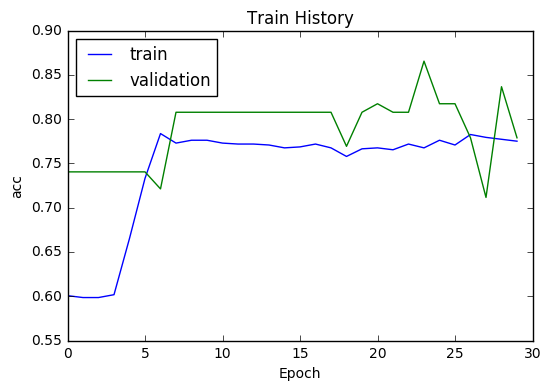

In [60]:
show_train_history(train_history,'acc','val_acc')

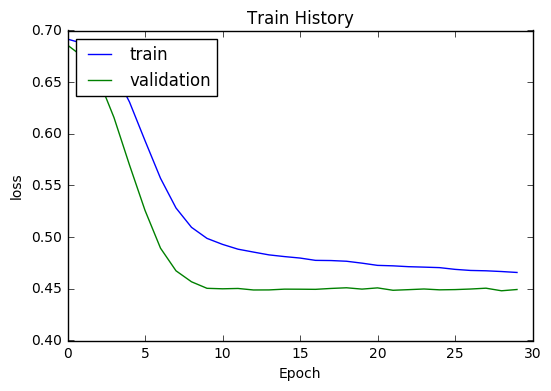

In [61]:
show_train_history(train_history,'loss','val_loss')

In [62]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 56us/step


In [63]:
scores[1]

0.7927272731607611